In [692]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial as Poly

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [694]:
# Data Cleaning

def remove_null(df):
    for index, row in df.iterrows():
        if row.isna().any():
            print(f"{index} missing values exist")

In [ ]:
# The quick brown fix jumped ober the lazy fdods
The quick broen fox jumped over the lazy dog    

In [ ]:
def remove_duplicates(df):
    
    df_duplicates1 = df.duplicated(subset = ["Age", "Gender", "Spending Score (1-100)"], keep = "first")

    cdf2 = df.drop_duplicates(subset = ["Age", "Gender", "Spending Score (1-100)"], keep = "first")

    df_duplicates2 = customer_df.duplicated(subset = ["Age", "Gender", "Annual Income (k$)"], keep = False)

    # pd.set_option("display.max_rows", 10)
    df_duplicates1
    df_duplicates2
    cdf2

In [651]:
customer_df = pd.read_csv("csv/mall_customers.csv")
customer_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [652]:
# cdf_duplicates = customer_df.duplicated(subset = ["Age", "Gender", "Annual Income (k$)"], keep = False)

# customer_df[cdf_duplicates]

# cdf1 = customer_df.drop([72, 158, 159, 172])

# cdf1[cdf_duplicates]

# cdf1

# Remove records with spending scores below critical threshold eg 1
# assert cdf_duplicates.any() == False

In [653]:
cdf_duplicates1 = cdf1.duplicated(subset = ["Age", "Gender", "Spending Score (1-100)"], keep = "first")

cdf2 = cdf1.drop_duplicates(subset = ["Age", "Gender", "Spending Score (1-100)"], keep = "first")

cdf_duplicates2 = customer_df.duplicated(subset = ["Age", "Gender", "Annual Income (k$)"], keep = False)

# pd.set_option("display.max_rows", 10)

cdf2


# assert cdf_duplicates.any() == False

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [654]:
for index, row in customer_df.iterrows():
    if row.isna().any():
        print(f"{index} missing values exist")

In [655]:
cdf = customer_df.copy()

print(customer_df["Age"].unique())

print(customer_df["Gender"].unique())

print(customer_df.dtypes)

customer_df

[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
['Male' 'Female']
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Already, there are few problems with our table. 

First, "CustomerID" should be the table index, "Annual Income" should be fully expressed as it would be more sensible visually. Also, there should be a category or range for the "Age" field and finally, the table column names should have a lower casing and not contain special characters for the sake of indexing.

In [656]:
labels = ["10 - 19", "20 - 29", "30 - 39", "40 - 49", "50 - 59", "60 - 69", "70+"]

ranges = [10, 19, 29, 39, 49, 59, 69, np.inf]

gender_dict = {"Male": 1, "Female": 2}

cdf["gender_class"] = cdf["Gender"].replace(gender_dict)

cdf["Age_group"] = pd.cut(customer_df["Age"], bins = ranges, labels = labels)

cdf["Annual Income (k$)"] = cdf["Annual Income (k$)"] * 1000

cdf["total_amount"] = (cdf["Annual Income (k$)"]) * (cdf["Spending Score (1-100)"] / 100)

new_order = ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'total_amount', 'gender_class', 'Gender', 'Age_group']

cdf = cdf[new_order]

new_column_names = {'CustomerID': 'customer_id', 'Age': 'age', 'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score', 'Gender': 'gender', 'Age_group': 'age_group'}

cdf = cdf.rename(columns = new_column_names)

cdf

,customer_id,age,annual_income,spending_score,total_amount,gender_class,gender,age_group
0,1,19,15000,39,5850.0,1,Male,10 - 19
1,2,21,15000,81,12150.0,1,Male,20 - 29
2,3,20,16000,6,960.0,2,Female,20 - 29
3,4,23,16000,77,12320.0,2,Female,20 - 29
4,5,31,17000,40,6800.0,2,Female,30 - 39
...,...,...,...,...,...,...,...,...
195,196,35,120000,79,94800.0,2,Female,30 - 39
196,197,45,126000,28,35280.0,2,Female,40 - 49
197,198,32,126000,74,93240.0,1,Male,30 - 39
198,199,32,137000,18,24660.0,1,Male,30 - 39


In [657]:
cdf

,customer_id,age,annual_income,spending_score,total_amount,gender_class,gender,age_group
0,1,19,15000,39,5850.0,1,Male,10 - 19
1,2,21,15000,81,12150.0,1,Male,20 - 29
2,3,20,16000,6,960.0,2,Female,20 - 29
3,4,23,16000,77,12320.0,2,Female,20 - 29
4,5,31,17000,40,6800.0,2,Female,30 - 39
...,...,...,...,...,...,...,...,...
195,196,35,120000,79,94800.0,2,Female,30 - 39
196,197,45,126000,28,35280.0,2,Female,40 - 49
197,198,32,126000,74,93240.0,1,Male,30 - 39
198,199,32,137000,18,24660.0,1,Male,30 - 39


In [658]:
cdf.shape

# outlier1 = cdf.query("spending_score < 9 & annual_income > 70000")

range_cdf = cdf.query("spending_score > 9 & annual_income < 70000")

outlier2 = range_cdf.query("spending_score < 9")

outlier2

range_cdf

,customer_id,age,annual_income,spending_score,total_amount,gender_class,gender,age_group
0,1,19,15000,39,5850.0,1,Male,10 - 19
1,2,21,15000,81,12150.0,1,Male,20 - 29
3,4,23,16000,77,12320.0,2,Female,20 - 29
4,5,31,17000,40,6800.0,2,Female,30 - 39
5,6,22,17000,76,12920.0,2,Female,20 - 29
...,...,...,...,...,...,...,...,...
119,120,50,67000,57,38190.0,2,Female,50 - 59
120,121,27,67000,56,37520.0,1,Male,20 - 29
121,122,38,67000,40,26800.0,2,Female,30 - 39
122,123,40,69000,58,40020.0,2,Female,40 - 49


In [659]:
outlier = unique_age_cdf.query("gender == 'Male' & total_amount > 60000 & annual_income > 60000 & age_group == '30 - 39'")
outlier

,customer_id,age,annual_income,spending_score,total_amount,gender_class,gender,age_group


In [660]:
cdf_duplicates = range_cdf.duplicated(subset = ["age", "gender", "annual_income"], keep = "last")

range_cdf[cdf_duplicates]

unique_age_cdf = range_cdf.drop_duplicates(subset = ["age", "gender", "annual_income"], keep = "last")

# unique_age_cdf[cdf_duplicates]

unique_age_cdf = unique_age_cdf.drop([123])

unique_age_cdf


,customer_id,age,annual_income,spending_score,total_amount,gender_class,gender,age_group
0,1,19,15000,39,5850.0,1,Male,10 - 19
1,2,21,15000,81,12150.0,1,Male,20 - 29
3,4,23,16000,77,12320.0,2,Female,20 - 29
4,5,31,17000,40,6800.0,2,Female,30 - 39
5,6,22,17000,76,12920.0,2,Female,20 - 29
...,...,...,...,...,...,...,...,...
118,119,51,67000,43,28810.0,2,Female,50 - 59
119,120,50,67000,57,38190.0,2,Female,50 - 59
120,121,27,67000,56,37520.0,1,Male,20 - 29
121,122,38,67000,40,26800.0,2,Female,30 - 39


In [661]:
unique_age_cdf.shape

(116, 8)

In [662]:
cdf = unique_age_cdf

In [663]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 0 to 122
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   customer_id     116 non-null    int64   
 1   age             116 non-null    int64   
 2   annual_income   116 non-null    int64   
 3   spending_score  116 non-null    int64   
 4   total_amount    116 non-null    float64 
 5   gender_class    116 non-null    int64   
 6   gender          116 non-null    object  
 7   age_group       116 non-null    category
dtypes: category(1), float64(1), int64(5), object(1)
memory usage: 7.7+ KB


In [664]:
cdf.describe(include = "category")

,age_group
count,116
unique,7
top,20 - 29
freq,29


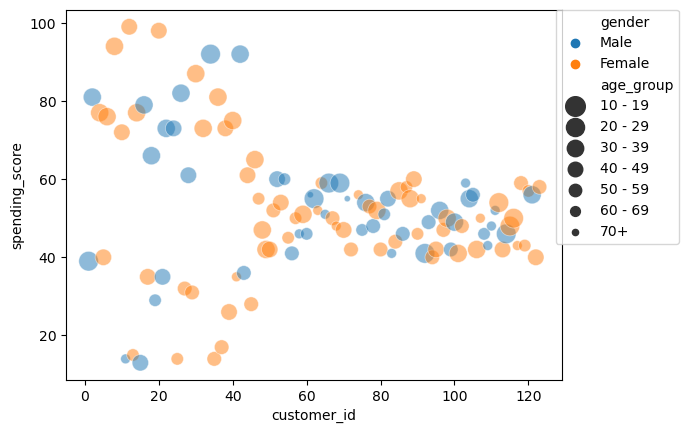

In [665]:
plt.figure(dpi = 100)
sns.scatterplot(
    data = cdf, x = "customer_id", y = "spending_score", hue = "gender",
    size = "age_group", sizes=(20, 200), alpha = 0.5
)

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.savefig("CustomerId_vs_Spending_Score")

plt.show()

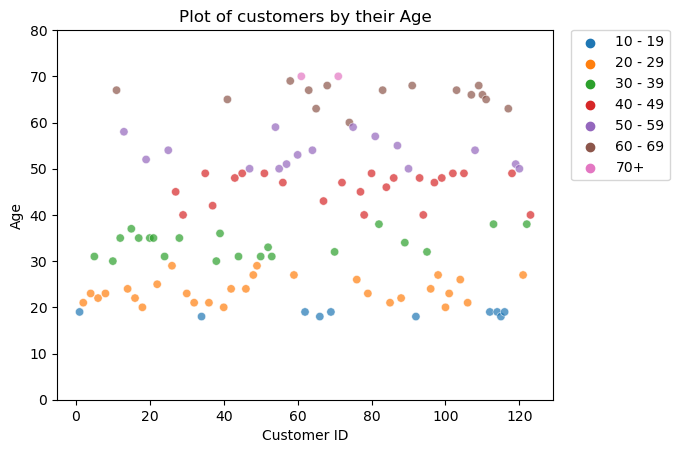

In [666]:
# Plot of customer id vs spending score

plt.figure(dpi = 100)

x = cdf["customer_id"]
y = cdf["age"]

sns.scatterplot(
    data = cdf, x = x, y = y, hue = "age_group",
    sizes=(20, 200), alpha = 0.7
)

plt.xlabel("Customer ID")
plt.ylabel("Age")

plt.ylim(0, 80)

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.title("Plot of customers by their Age")

plt.savefig("customers_by_their_Age")

plt.show()

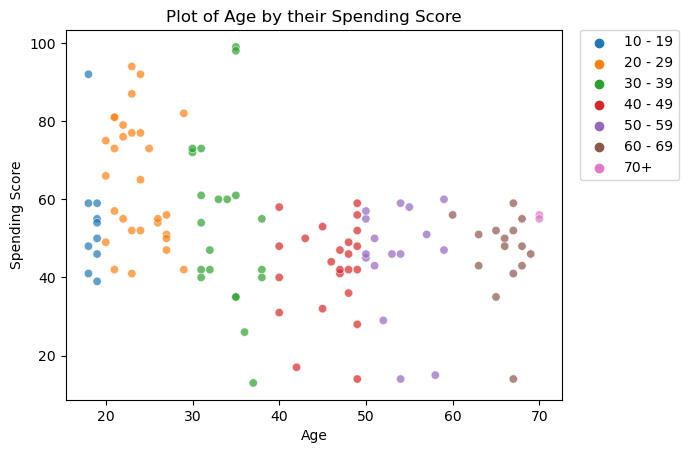

In [667]:
# Plot of customer id vs spending score
%matplotlib inline
plt.figure(dpi = 100)

x = cdf["age"]
y = cdf["spending_score"]

sns.scatterplot(
    data = cdf, x = x, y = y, hue = "age_group",
    sizes=(20, 200), alpha = 0.7
)

plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1.02))

plt.title("Plot of Age by their Spending Score")

plt.savefig("age_by_spending")

plt.show()

['10 - 19', '20 - 29', '30 - 39', '60 - 69', '50 - 59', '40 - 49', '70+']
Categories (7, object): ['10 - 19' < '20 - 29' < '30 - 39' < '40 - 49' < '50 - 59' < '60 - 69' < '70+']


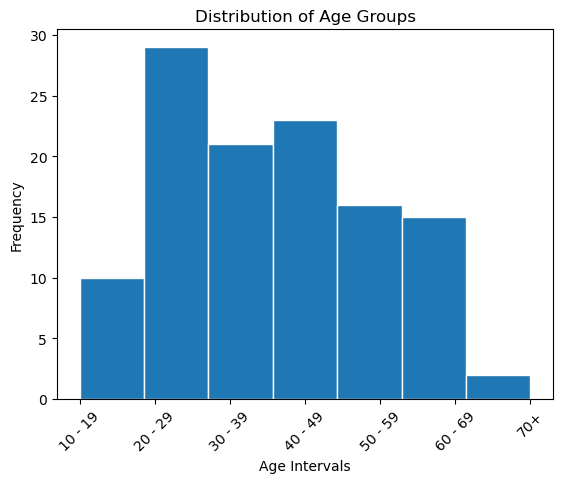

In [668]:
# Histogram plot of customers by their age groups 

groups_label = cdf["age_group"].unique()

print(groups_label)

age_sorted = cdf.sort_values(by='age_group', ascending=True)

plt.figure(dpi = 100)

plt.hist(age_sorted["age_group"], bins = len(labels), edgecolor = "white")

plt.xlabel("Age Intervals")
plt.ylabel("Frequency")

plt.title("Distribution of Age Groups")

plt.xticks(rotation = 45)

plt.show()

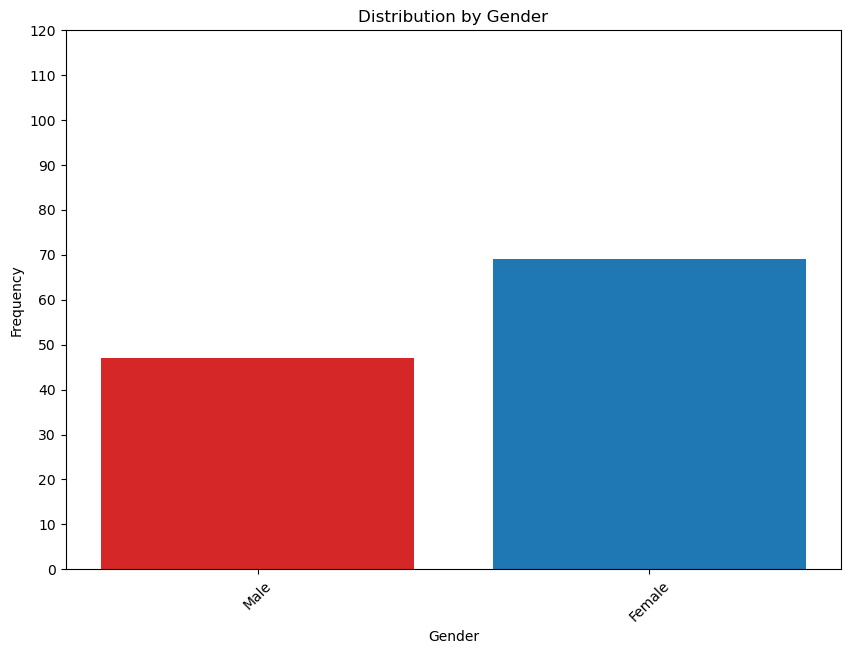

In [669]:
# Histogram plot of customers by their gender 

plt.figure(figsize = (10, 7))

gender = cdf["gender"].unique()
count = [len(cdf[cdf["gender"] == "Male"]), len(cdf[cdf["gender"] == "Female"])]
bar_labels = cdf["gender"].unique()
bar_colors = ['tab:red', 'tab:blue']

plt.bar(gender, count, label = bar_labels, color = bar_colors)
# print(len(cust_by_age[cust_by_age["Gender"] == "Male"]))
# plt.bar(age_sorted["Gender"], height = 10, bins = len(labels), edgecolor = "white")

plt.xlabel("Gender")
plt.ylabel("Frequency")

plt.title("Distribution by Gender")

plt.savefig("gender_dist")

plt.xticks(rotation = 45)
plt.yticks(np.linspace(0, 120, 13))

plt.show()

In [670]:
cdf

,customer_id,age,annual_income,spending_score,total_amount,gender_class,gender,age_group
0,1,19,15000,39,5850.0,1,Male,10 - 19
1,2,21,15000,81,12150.0,1,Male,20 - 29
3,4,23,16000,77,12320.0,2,Female,20 - 29
4,5,31,17000,40,6800.0,2,Female,30 - 39
5,6,22,17000,76,12920.0,2,Female,20 - 29
...,...,...,...,...,...,...,...,...
118,119,51,67000,43,28810.0,2,Female,50 - 59
119,120,50,67000,57,38190.0,2,Female,50 - 59
120,121,27,67000,56,37520.0,1,Male,20 - 29
121,122,38,67000,40,26800.0,2,Female,30 - 39


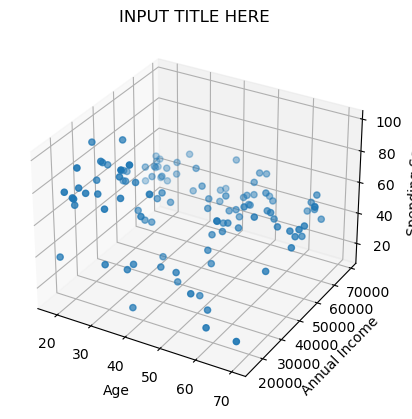

In [671]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(cdf["age"], cdf["annual_income"], cdf["spending_score"], marker = "o")

plt.title("INPUT TITLE HERE")

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.savefig("3d_plot_for_age_income_spending")

plt.show()

In [672]:
# Correlation matrix and confusion matrix

figures = cdf.iloc[:, 1:5]
gen_fig = cdf.iloc[:, [1, 2, 3, 4, 6]]
corr_matrix = figures.corr(method = "pearson")
corr_matrix

,age,annual_income,spending_score,total_amount
age,1.000000,0.231394,-0.389011,0.002005
annual_income,0.231394,1.000000,-0.198055,0.805400
spending_score,-0.389011,-0.198055,1.000000,0.382044
total_amount,0.002005,0.805400,0.382044,1.000000


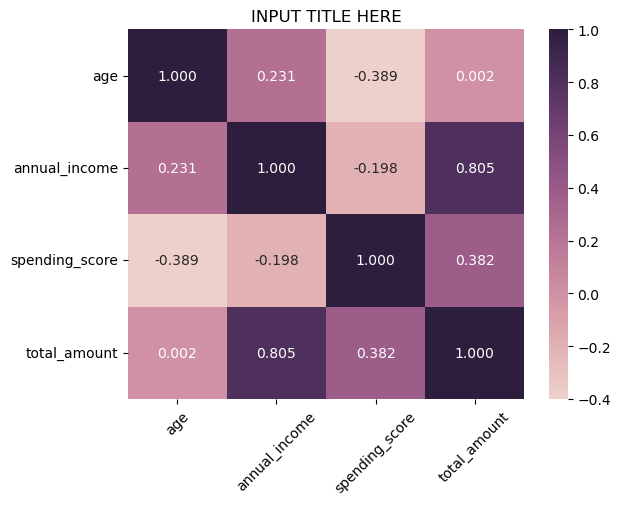

In [673]:
%matplotlib inline
sns.heatmap(corr_matrix, cmap=sns.cubehelix_palette(as_cmap = True), vmin = -0.4, vmax = 1, annot = True, fmt=".3f")

plt.xticks(rotation = 45)

plt.title("INPUT TITLE HERE")

plt.savefig("correlation_martrix")

plt.show()

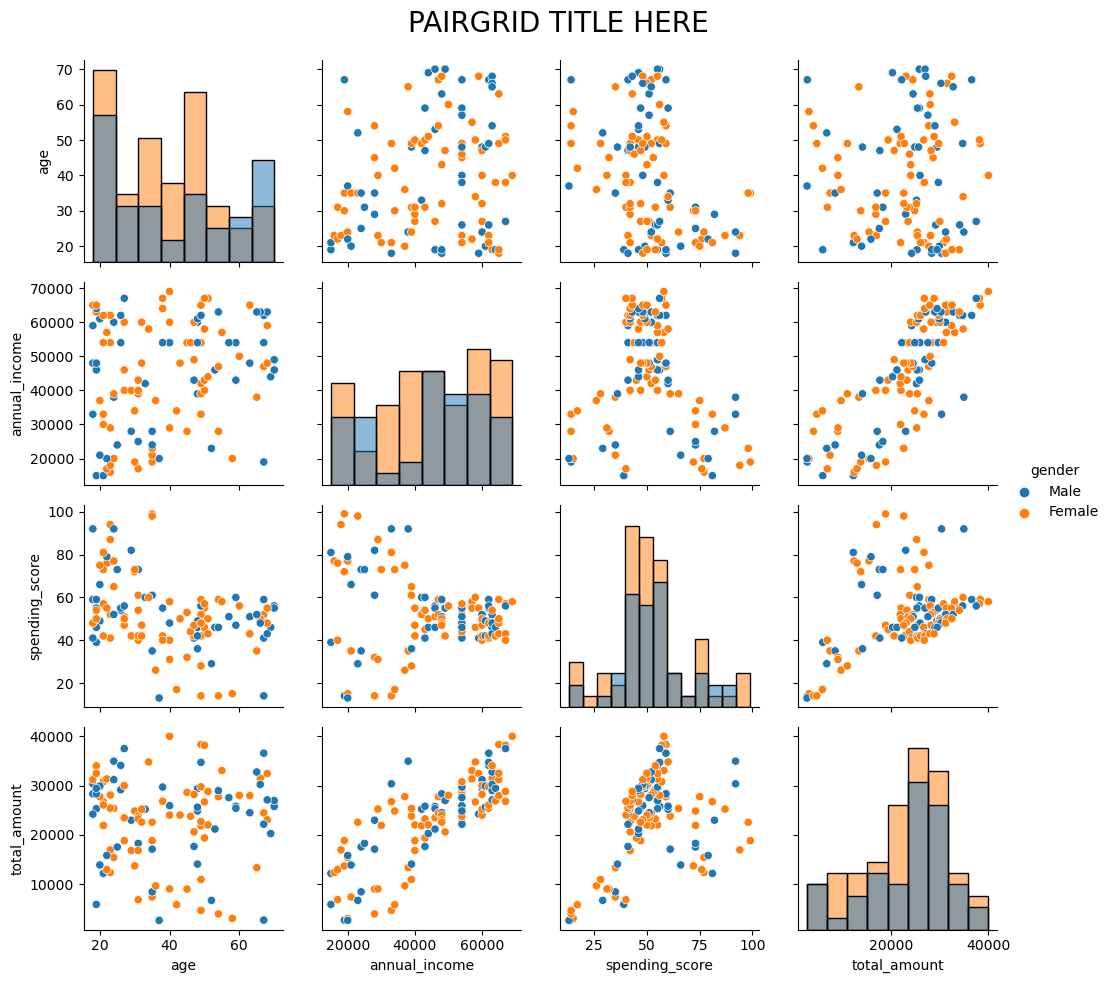

In [674]:
# Pairplot
g = sns.PairGrid(gen_fig, hue = 'gender')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

g.figure.suptitle("PAIRGRID TITLE HERE", size = 20)
plt.subplots_adjust(top = 0.93)
g.add_legend()

plt.savefig("pairgrid")

plt.show()

In [675]:
# Let's start clustering

# sns

In [676]:
# Let's start model fitting on annual income vs total spending

def linfunc(x, d, e, f, g):
    """ Function for fitting a straight line, for curve_fit
        x: independent variable
        a, b: parameters to be fitted
    """
    y = (d * (x ** 3)) + (e * (x ** 2)) + (f * x) + g
    return y

In [677]:
inc = cdf["annual_income"]
spending = cdf["total_amount"]

p, cov = curve_fit(linfunc, inc, spending)  # give it the function to be fitted then x and y

# the errors are the square root of the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(cov))

print(f"a = {p[0]:.2f} +/- {sigma[0]:.2f}")
print(f"b = {p[1]:.2f} +/- {sigma[1]:.2f}")
print(f"c = {p[2]:.2f} +/- {sigma[2]:.2f}")
print(f"d = {p[3]:.2f} +/- {sigma[3]:.2f}")
# print(f"e = {p[4]:.2f} +/- {sigma[4]:.2f}")
# print(f"f = {p[5]:.2f} +/- {sigma[5]:.2f}")
# print(f"g = {p[6]:.2f} +/- {sigma[6]:.2f}")

a = 0.00 +/- 0.00
b = -0.00 +/- 0.00
c = 0.69 +/- 0.89
d = 34.16 +/- 10476.38


In [678]:
p_np = Poly.fit(inc, spending, 3)  # Polynomial just needs inc, spending data and the number of degrees
cov = np.polyfit(inc, spending, 3, cov = True)[1]  # need a separate call as numpy devs have still not merged
sigma_np = np.sqrt(np.diag(cov))

d, c, b, a = p_np.convert().coef  # note the opposite order of coefficients
print(f"a = {a:.2f} +/- {sigma_np[0]:.2f}")
print(f"b = {b:.2f} +/- {sigma_np[1]:.2f}")
print(f"c = {c:.2f} +/- {sigma_np[2]:.2f}")
print(f"d = {d:.2f} +/- {sigma_np[3]:.2f}")
# print(f"e = {e:.2f} +/- {sigma_np[4]:.2f}")
# print(f"f = {f:.2f} +/- {sigma_np[5]:.2f}")
# print(f"g = {g:.2f} +/- {sigma_np[6]:.2f}")

a = 0.00 +/- 0.00
b = -0.00 +/- 0.00
c = 0.69 +/- 0.89
d = 34.16 +/- 10476.37


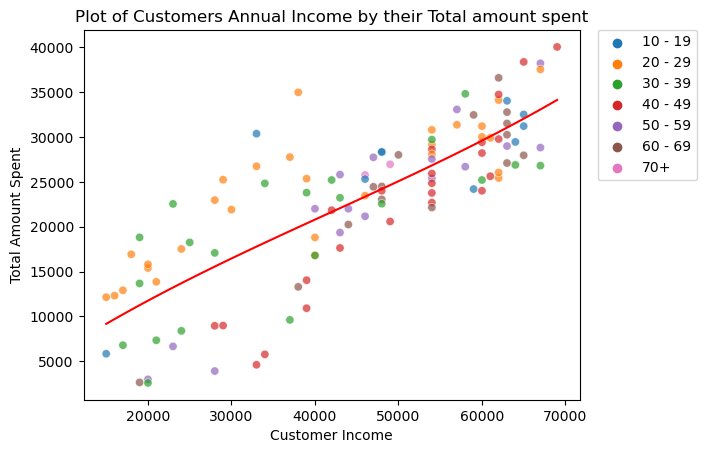

In [679]:
# Fitting plot on customer income vs total amount spent

plt.figure(dpi = 100)

sns.scatterplot(
    data = cdf, x = inc, y = spending, hue = "age_group",
    sizes=(20, 200), alpha = 0.7
)

xfit = np.linspace(np.min(inc), np.max(inc), 100)
plt.plot(xfit, linfunc(xfit, p[0], p[1], p[2], p[3]), 'r-')

plt.xlabel("Customer Income")
plt.ylabel("Total Amount Spent")

# plt.ylim(0, 80)

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.title("Plot of Customers Annual Income by their Total amount spent")

plt.savefig("customer_income_by_age_fit")

plt.show()

a = 0.01 +/- 0.00
b = -2.92 +/- 0.50
c = 203.81 +/- 38.69
d = -4806.21 +/- 1189.07
e = 38263.64 +/- 11837.69


a = 0.01 +/- 0.00
b = -2.92 +/- 0.50
c = 203.81 +/- 38.69
d = -4806.21 +/- 1189.07
e = 38263.64 +/- 11837.70




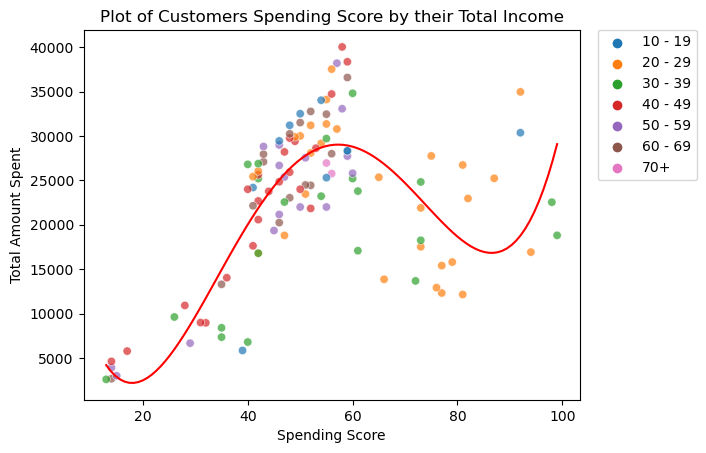

In [680]:
# Let's start model fitting on annual income vs total spending

def linfunc(x, a, b, c, d, e):
    """ 
        Function for fitting a 4 degree polynomial, for curve_fit
        x: independent variable
        a, b, c, d, e: parameters to be fitted
    """
    y = (a * (x ** 4)) + (b * (x ** 3)) + (c * (x ** 2)) + (d * x) + e
    return y

inc = cdf["spending_score"]
spending = cdf["total_amount"]

p, cov = curve_fit(linfunc, inc, spending)  

sigma = np.sqrt(np.diag(cov))

print(f"a = {p[0]:.2f} +/- {sigma[0]:.2f}")
print(f"b = {p[1]:.2f} +/- {sigma[1]:.2f}")
print(f"c = {p[2]:.2f} +/- {sigma[2]:.2f}")
print(f"d = {p[3]:.2f} +/- {sigma[3]:.2f}")
print(f"e = {p[4]:.2f} +/- {sigma[4]:.2f}\n\n")

p_np = Poly.fit(inc, spending, 4)
cov = np.polyfit(inc, spending, 4, cov = True)[1]
sigma_np = np.sqrt(np.diag(cov))

e, d, c, b, a = p_np.convert().coef
print(f"a = {a:.2f} +/- {sigma_np[0]:.2f}")
print(f"b = {b:.2f} +/- {sigma_np[1]:.2f}")
print(f"c = {c:.2f} +/- {sigma_np[2]:.2f}")
print(f"d = {d:.2f} +/- {sigma_np[3]:.2f}")
print(f"e = {e:.2f} +/- {sigma_np[4]:.2f}\n\n")

# Fitting plot on customer income vs total amount spent

plt.figure(dpi = 100)

sns.scatterplot(
    data = cdf, x = inc, y = spending, hue = "age_group",
    sizes=(20, 200), alpha = 0.7
)

xfit = np.linspace(np.min(inc), np.max(inc), 100)
plt.plot(xfit, linfunc(xfit, p[0], p[1], p[2], p[3], p[4]), 'r-')

plt.xlabel("Spending Score")
plt.ylabel("Total Amount Spent")

# plt.ylim(0, 80)

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.title("Plot of Customers Spending Score by their Total Income")

plt.savefig("customers_spending_by_total_income_fit")

plt.show()

In [681]:
np.max(inc)

99

a = 0.45 +/- 0.03
b = 2827.60 +/- 1473.99


a = 0.45 +/- 0.03
b = 2827.60 +/- 1473.99


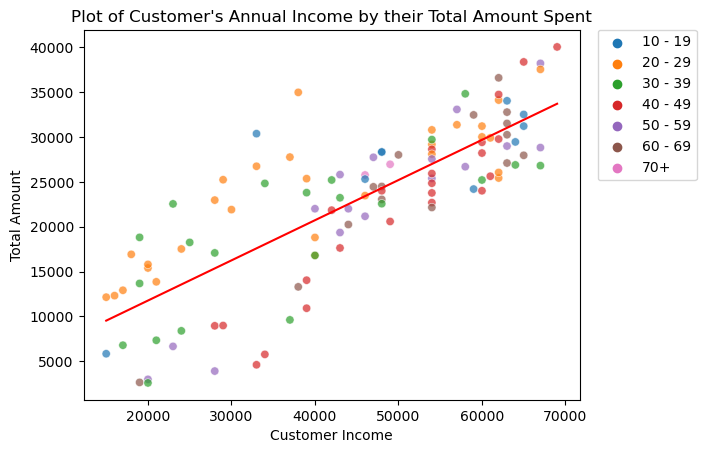

In [682]:
# Let's start model fitting on annual income vs total spending

def linfunc(x, a, b):
    """ Function for fitting a straight line, for curve_fit
        x: independent variable
        a, b: parameters to be fitted
    """
    y = (a * x) + b
    return y

inc = cdf["annual_income"]
spending = cdf["total_amount"]

p, cov = curve_fit(linfunc, inc, spending)

sigma = np.sqrt(np.diag(cov))

print(f"a = {p[0]:.2f} +/- {sigma[0]:.2f}")
print(f"b = {p[1]:.2f} +/- {sigma[1]:.2f}\n\n")

p_np = Poly.fit(inc, spending, 1)
cov = np.polyfit(inc, spending, 1, cov = True)[1]
sigma_np = np.sqrt(np.diag(cov))

b, a = p_np.convert().coef
print(f"a = {a:.2f} +/- {sigma_np[0]:.2f}")
print(f"b = {b:.2f} +/- {sigma_np[1]:.2f}")

# Fitting plot on customer income vs total amount spent

plt.figure(dpi = 100)

sns.scatterplot(
    data = cdf, x = inc, y = spending, hue = "age_group",
    sizes=(20, 200), alpha = 0.7
)

xfit = np.linspace(np.min(inc), np.max(inc), 100)
plt.plot(xfit, linfunc(xfit, p[0], p[1]), 'r-')

plt.xlabel("Customer Income")
plt.ylabel("Total Amount")

# plt.ylim(0, 80)

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.title("Plot of Customer's Annual Income by their Total Amount Spent")

plt.show()

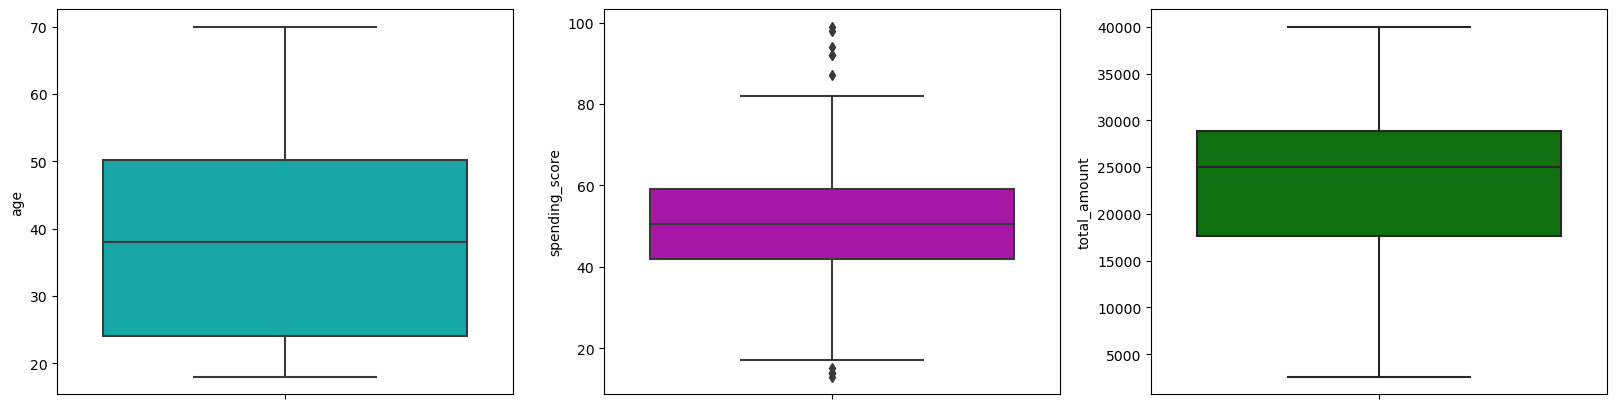

In [683]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

sns.boxplot(y = "age", palette = ["c"], data = cdf, ax = ax[0])
sns.boxplot(y = "spending_score", palette = ["m"], data = cdf, ax = ax[1])
sns.boxplot(y = "total_amount", palette = ["g"], data = cdf, ax = ax[2])

plt.savefig("age_score_total_boxplot")

plt.show()

C:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


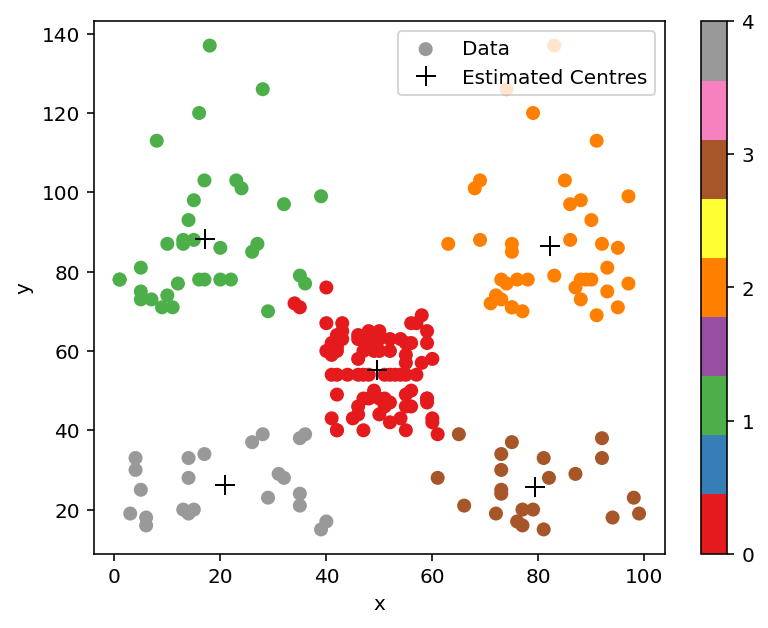

In [684]:
x = customer_df["Spending Score (1-100)"]
y = customer_df["Annual Income (k$)"]

xy = np.column_stack((x, y))

ncluster = 5
# set up the clusterer with the number of expected clusters (by eye)
# kmeans starts with a random seed and repeats the clustering n_init times.
kmeans = KMeans(n_clusters = ncluster, n_init = 20)

# Fit the data, results are stored in the kmeans object
kmeans.fit(xy)     # fit done on x,y pairs

labels = kmeans.labels_  # the group for each fitted point
    
# the estimated cluster centres
cen = kmeans.cluster_centers_
xkmeans = cen[:, 0]
ykmeans = cen[:, 1]

# def plot_fitted_clusters():
#     """
#     Plots clustered data as a scatter plot with determined centres shown
#     """
#     fig, ax = plt.subplots(dpi = 144)
#     s = ax.scatter(x, y, marker = 'o', label = 'Data')

#     ax.plot(xkmeans, ykmeans, 'bs', ms = 10, label = 'Estimated Centres')

#     cbar = fig.colorbar(s, ax = ax)
#     # cbar.set_ticks(np.unique(nclust))
#     ax.legend()
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     plt.show()
#     return

# plot_fitted_clusters()

def plot_fitted_clusters():
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    fig, ax = plt.subplots(dpi=144)
    
    # Plot data points with different colors based on their cluster labels
    s = ax.scatter(x, y, c = labels, cmap = 'Set1', marker = 'o', label = 'Data')

    # Plot the estimated cluster centers
    ax.plot(xkmeans, ykmeans, 'k+', ms = 10, label = 'Estimated Centres')

    # Add colorbar to show the mapping of cluster labels to colors
    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

plot_fitted_clusters()

In [685]:
def plot_fitted_clusters():
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    fig, ax = plt.subplots(dpi = 144)
    s = ax.scatter(x, y, marker = 'o', label = 'Data')

    ax.plot(xkmeans, ykmeans, 'bs', ms = 10, label = 'Estimated Centres')

    cbar = fig.colorbar(s, ax = ax)
    # cbar.set_ticks(np.unique(nclust))
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()
    return

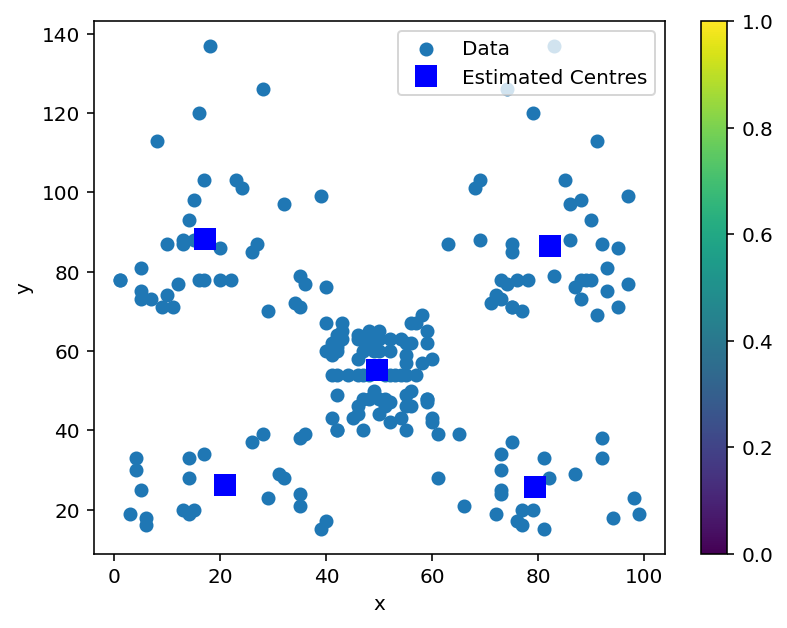

In [686]:
plot_fitted_clusters()

In [687]:
silhouette_score(xy, labels)

0.553931997444648

In [688]:
def one_silhoutte(n, xy):
    """ 
    Calculates the silhoutte score for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters = n, n_init = 20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)

    return score

In [689]:
best_n, best_score = None, -np.inf
for n in range(3, 9):  # 2 to 10 clusters
    score = one_silhoutte(n, xy)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")

C:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 3 clusters silhoutte score = 0.47


C:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 4 clusters silhoutte score = 0.49


C:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 5 clusters silhoutte score = 0.55


C:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 6 clusters silhoutte score = 0.54


C:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 7 clusters silhoutte score = 0.53


C:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 8 clusters silhoutte score = 0.46
Best number of clusters =  5


In [690]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.show()
    return

C:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

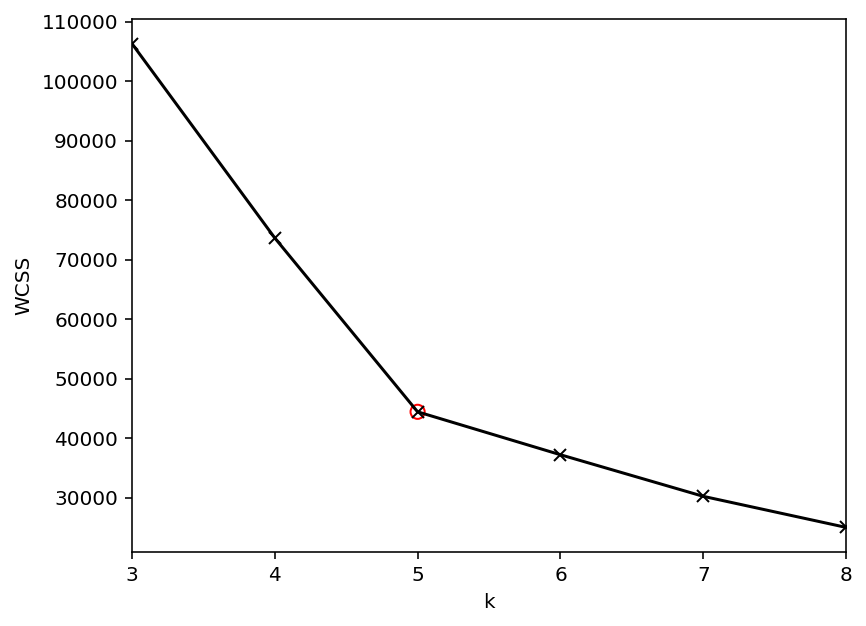

In [691]:
wcss = []
for n in range(3, 9):
    kmeans = KMeans(n_clusters=n, n_init=20)
    kmeans.fit(xy)
    wcss.append(kmeans.inertia_)

plot_elbow_method(3, 8, wcss, best_n)